# Inventory Problem

## tabular style

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class INVENTORY:
    def __init__(self, M, N):
        self.M = M
        self.N = N
        self.begining_inventory = 3
        self.ending_inventory = 0
        self.shortage_quantity = 0
        self.order_quantity = 8
        self.days_until_order_arrives = 2
 
        self.demand = [0, 1, 2, 3, 4] 
        self.lead_time = [1, 2, 3]
        self.demands_probability = [0.10, 0.25, 0.35, 0.21, 0.09]
        self.leads_time_probability = [0.6, 0.3, 0.1]
 
        self.ending_inventory_list = []
        self.number_days_sortage = 0
        self.print_list = []
 
    def simulation(self, cycle_range):
        # tabular style
        print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("|\tCycle\t|\tDay\t|\tBegnning inventory\t|\tDemand\t|\tEnding inventory\t|\tShortage quantity\t|\tOrder quantity\t|\tDays untill ordre arrives\t|")
        print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        np.random.seed(0) # seed 0
        for cycle in range(1, cycle_range):
            #print("Cycle no:", cycle)
            for day in range(1, self.N + 1):
                self.print_list = []
                if day == 1 :
                    self.print_list.append(cycle)
                else:
                    self.print_list.append(" ")

                self.print_list.append(day)
                self.print_list.append(self.begining_inventory)

                self.days_until_order_arrives -= 1
                daily_demand = np.random.choice(a = self.demand, p = self.demands_probability)
 
                self.print_list.append(daily_demand)
 
                total_demand = daily_demand + self.shortage_quantity
                if(total_demand > self.begining_inventory):
                    self.ending_inventory = 0
                    self.shortage_quantity = total_demand - self.begining_inventory
                    self.number_days_sortage += 1
                else:
                    self.ending_inventory = self.begining_inventory - total_demand
                    self.shortage_quantity = 0
 
                self.print_list.append(self.ending_inventory)
                self.print_list.append(self.shortage_quantity)
 
                #order place on every N days (Assingemnt Task - 1)
                if day == self.N:
                    #order place, order quantity
                    #randomly lead time / day untill order arrives
                    self.order_quantity =self.M - self.ending_inventory
                    self.days_until_order_arrives = np.random.choice( a = self.lead_time, p = self.leads_time_probability)
                    self.print_list.append(self.order_quantity)
                else:
                     self.print_list.append("-")
 
                if self.days_until_order_arrives >= 0:
                    self.print_list.append(self.days_until_order_arrives)
                else:
                    self.print_list.append("-")
 
                self.ending_inventory_list.append(self.ending_inventory) #add in list ending inventory
                #next days work update
                self.begining_inventory = self.ending_inventory
                # order arrives : (Assingnment Task - 2)
                if self.days_until_order_arrives == 0: 
                    self.begining_inventory += self.order_quantity
                
                self.print_table()
                if day == self.N:
                    print("\n-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
                else:
                    print("\n\t\t-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
                    
        self.matric_and_graph()
    
    def print_table(self):
        print("|\t", self.print_list[0] , end = "\t|\t")
        print(self.print_list[1] , end = "\t|\t")
        print("\t",self.print_list[2] , end = "\t\t|\t")
        print(self.print_list[3] , end = "\t|\t")
        print("\t", self.print_list[4] , end = "\t\t|\t")
        print("\t",self.print_list[5] , end = "\t\t|\t")
        print("\t",self.print_list[6] , end = "\t|\t")
        print("\t",self.print_list[7] , end = "\t\t\t|\t")
            
    def matric_and_graph(self):
        print("\n\n\n\n\n-----------------------Task - 3-----------------------\n")
        average_inventory = round((sum(self.ending_inventory_list)/len(self.ending_inventory_list)), 2)
        print("Average ending inventory: ", average_inventory )
        print("Number of days shortage occurs: ", self.number_days_sortage)
        print("\n\n\n")
        plt.rcParams['figure.figsize'] = (20,8)
        days = list(range(1, len(self.ending_inventory_list)+1))
        plt.plot (days, self.ending_inventory_list)
        plt.xlabel('Day number', fontsize=15)
        plt.ylabel('Ending inventory of each day', fontsize=15)
        plt.show()

M : 11
N : 5
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|	Cycle	|	Day	|	Begnning inventory	|	Demand	|	Ending inventory	|	Shortage quantity	|	Order quantity	|	Days untill ordre arrives	|
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|	 1	|	1	|		 3		|	2	|		 1		|		 0		|		 -	|		 1			|	
		-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|	  	|	2	|		 1		|	3	|		 0		|		 2		|		 -	|		 0			|	
		-----------------------------------------------------------------------------------------------------------------------------------------

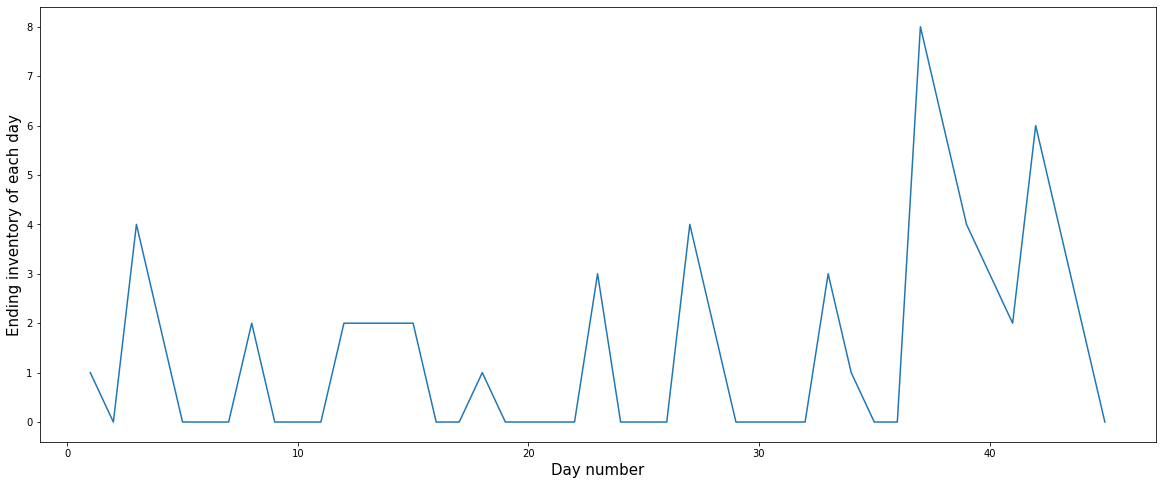

In [ ]:
M = int(input("M : "))
N = int(input("N : "))
# M = 11
# N = 5
total_cycle = 10
theinventory = INVENTORY(M, N)
theinventory.simulation(total_cycle)